# Lecture 4: Describing relationships between variables




## Univariate and Bivariate Plots

More approaches to exploratory data analysis (EDA)
  - What do the data look like?
  - How are they distributed?
  - How do they look in relation to each other?


## Univariate and Bivariate Plots

Exploring these questions can help us understand how we want to analyze our data

![Alt Text](https://i.gifer.com/UreQ.gif)


### Learning Objectives

- Learn how to explore our data to discern initial patterns
- Use boxplots to compare data across multiple groupings
- Visualize broad patterns in continuous variables using scatterplots
- Learn to transform our data to make them easier to interpret


In [104]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [103]:
# Read in our Pantheria data
pantheria = pd.read_csv('pantheria.txt',sep="\t")

important_columns = ["MSW05_Order","MSW05_Genus","MSW05_Species","5-1_AdultBodyMass_g","24-1_TeatNumber","6-2_TrophicLevel","25-1_WeaningAge_d","15-1_LitterSize","14-1_InterbirthInterval_d","6-1_DietBreadth"]

sub_pantheria = pantheria[important_columns]

sub_pantheria_renamed = sub_pantheria.rename(
    columns={
        'MSW05_Order': 'order',
        'MSW05_Genus': 'genus',
        'MSW05_Species': 'species',
        '5-1_AdultBodyMass_g': 'body_mass_g',
        '24-1_TeatNumber': 'teat_number',
        '6-2_TrophicLevel': 'trophic_level',
        '25-1_WeaningAge_d': 'weaning_age_d',
        '15-1_LitterSize': 'litter_size',
        '14-1_InterbirthInterval_d': 'interbirth_interval_d',
        "6-1_DietBreadth": "diet_breadth"
    })


# Variables

Now that we've set up our dataset, let's look at the variables in our dataset by type:
- Categorical Variables: 
- Ordinal Variables: `trophic_level`
- Interval Variables: 
- Ratio Variables `litter_size` , `weaning_age_d` , `body_mass_g`



## Life history theory

Question:  **Do mammals at higher trophic levels invest more heavily in their offspring?**
  - 'r/K' selection theory
  - starting point for developing **life history theory** of parental investment
  - Understanding parental investment can tell us how species evolve new ecological strategies


### r-selected mammals

Have many offspring, invest little in each one, fast growth

![Alt Text](images/mice.jpg)




## K-selected mammals

Fewer offspring, more investment per offspring, slower growth


![Alt Text](images/elephant.jpg)


## Ecological strategies

![Alt Text](images/specialists.svg)

- specialists: 
  + exploit only a couple of different foods
  + narrow "niche"
  + usually reflect constant conditions

## Ecological strategies

![Alt Text](images/generalists.svg)

- generalists: 
  + exploit many different foods
  + broad "niche"
  + usually reflect changing conditions

## Ecological strategies

![Alt Text](images/generalists-and-specialists.png)



## Hypothesis:

Mammals that are dietary generalists will have:
  - **more offspring per litter**
  - lower parental investment per offspring
  
compared to mammals that specialize in only a couple foods

## Measuring ecological strategy

We will approximate the generalist vs specialist continuum using our `diet_breadth` variable
  + Mammals that eat more foods are more likely to be generalists overall
  
  ![Alt Text](images/pizza.svg)

## Boxplot

- We can use a boxplot to look at how continuous values are distributed among discrete groups
- We will use the `seaborn` library, which gives us some convenient functions for plotting

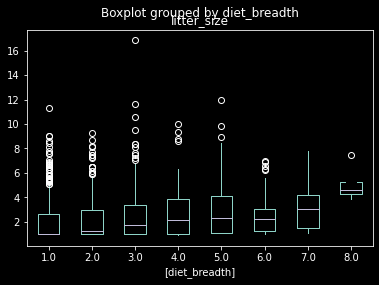

In [166]:
## Do species at different trophic levels have different numbers of offspring per litter? 

sub_pantheria_renamed.boxplot(column=['litter_size'],by=['diet_breadth'])
plt.grid(False)


## Transformation

- The values we are interested in are pretty squished toward the bottom
- We can **transform** them so that they are better spread out

![Alt Text](https://media.giphy.com/media/oqwsns7qHCEi4/giphy.gif)

## Logarithms 

- One easy way to spread out our values is by using logarithms
- Instead of measuring `litter_size`, we measure the logarithm of `litter_size`

## Histograms

A good way to check how are data are spread out is by plotting **histograms**
  - univariate plots/charts/graphs (we can use these words interchangeably)
  - visualize the distribution of data
    + The y-axis shows the count of observations while the x-axis shows the variable's value

/usr/lib/python3/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'count')

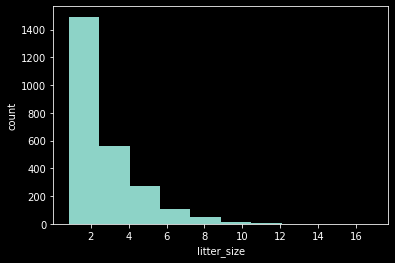

In [106]:
# The x-axis shows the range of litter sizes
# y-axis reflects the number of times that size appears in the dataset
# Notice how most values are between 1-4 -- it would be helpful to spread these out

plt.hist(sub_pantheria_renamed["litter_size"])
plt.xlabel("litter_size")
plt.ylabel("count")

Text(0, 0.5, 'count')

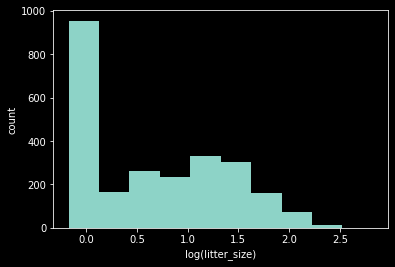

In [107]:
# The x-axis shows the logarithm across the range of litter sizes
# y-axis reflects the number of times that size appears in the dataset

# This is easier to interpret-- just don't forget that we are dealing with log units! 

plt.hist(np.log(sub_pantheria_renamed["litter_size"]))
plt.xlabel("log(litter_size)")
plt.ylabel("count")

# Discussion question: why are so many values grouped at 0?

Now let's try our boxplot again after taking the logarithm of litter size

In [162]:
sub_pantheria_renamed["log_litter_size"]=np.log(sub_pantheria_renamed["litter_size"])

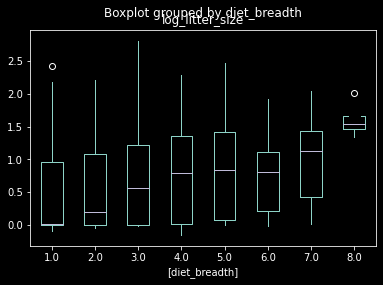

In [167]:
## Do species at different trophic levels have different numbers of offspring? 

sub_pantheria_renamed.boxplot(column=['log_litter_size'],by=['diet_breadth'])
plt.grid(False)


### Do dietary generalists have more offspring? 

![Alt Text](https://media.giphy.com/media/d17nhnqHflmUM/giphy-downsized-large.gif)

## Exercise

Try to figure out how many missing datapoints there are for each mammalian order

Could our conclusions be biased by the way missing values are distributed?

### Raising babies is a lot of work 

![Alt Text](images/parents.svg)

## Hypothesis:

Mammals that are generalists will have:
  - ~~more offspring~~
  - **lower parental investment**
  
compared to specialists

### How do we measure parental investment?

- **Weaning age**: More time spent breastfeeding -> greater investment of time/resources

### How do we measure parental investment?

- **Weaning age**: More time spent breastfeeding -> greater investment of time/resources
- **Interbirth interval**: Mothers who wait longer between births usually invest more in each offspring

Our hypothesis predicts that generalists will have:
  - earlier weaning ages 
  - shorter interbirth intervals
To reflect lower investment _per offspring_

(array([858., 145.,  95.,  23.,  19.,  14.,   5.,   1.,   3.,   1.]),
 array([   1.94 ,  127.827,  253.714,  379.601,  505.488,  631.375,
         757.262,  883.149, 1009.036, 1134.923, 1260.81 ]),
 <BarContainer object of 10 artists>)

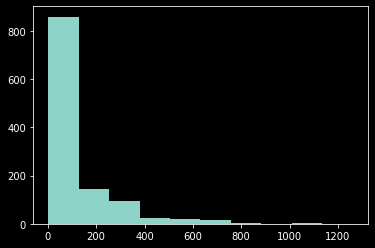

In [127]:
# Let's check to see how weaning age is distributed-- should we transform?

plt.hist(sub_pantheria_renamed["weaning_age_d"].dropna())

(array([  2.,   3.,   7., 208., 300., 249., 172., 124.,  80.,  19.]),
 array([0.66268797, 1.31037014, 1.95805231, 2.60573448, 3.25341664,
        3.90109881, 4.54878098, 5.19646315, 5.84414532, 6.49182748,
        7.13950965]),
 <BarContainer object of 10 artists>)

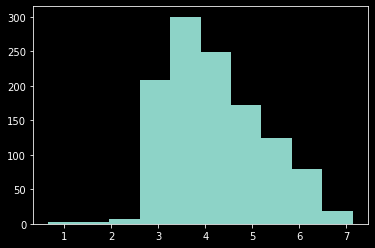

In [129]:
# This looks better

plt.hist(np.log(sub_pantheria_renamed["weaning_age_d"].dropna()))

In [154]:
sub_pantheria_renamed["weaning_age_logd"]=np.log(sub_pantheria_renamed["weaning_age_d"])

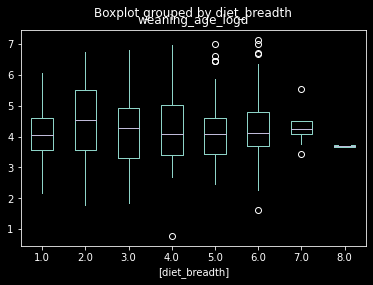

In [161]:
sub_pantheria_renamed.boxplot(column=['weaning_age_logd'],by=['diet_breadth'])
plt.grid(False)


(array([262., 292.,  55.,  41.,  20.,   9.,   5.,   3.,   3.,   5.]),
 array([  17.  ,  216.05,  415.1 ,  614.15,  813.2 , 1012.25, 1211.3 ,
        1410.35, 1609.4 , 1808.45, 2007.5 ]),
 <BarContainer object of 10 artists>)

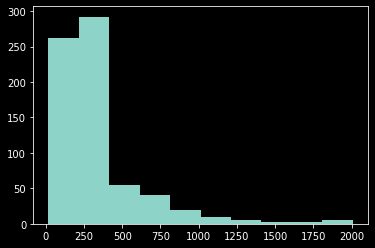

In [135]:
# Check the distribution for interbirth interval

plt.hist(sub_pantheria_renamed["interbirth_interval_d"].dropna())

In [156]:
sub_pantheria_renamed["interbirth_interval_logd"]=np.log(sub_pantheria_renamed["interbirth_interval_d"])

/usr/lib/python3/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 45.,  55.,  39.,  28.,  75.,  68., 262.,  72.,  36.,  15.]),
 array([2.83321334, 3.31035655, 3.78749976, 4.26464297, 4.74178618,
        5.21892939, 5.69607261, 6.17321582, 6.65035903, 7.12750224,
        7.60464545]),
 <BarContainer object of 10 artists>)

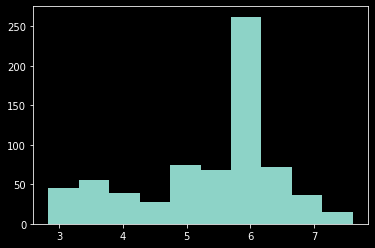

In [157]:
# This looks better

plt.hist(sub_pantheria_renamed["interbirth_interval_logd"])

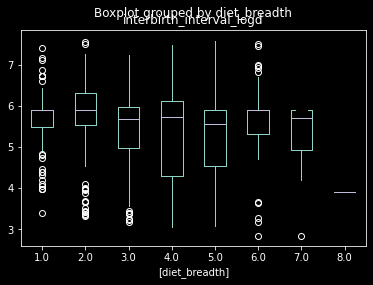

In [160]:
sub_pantheria_renamed.boxplot(column=['interbirth_interval_logd'],by=['diet_breadth'])
plt.grid(False)

## Do generalists invest less in each offspring?

![Alt Text](https://media.giphy.com/media/THJ2ageyNjvALKm6gH/giphy.gif)


**Does mammalian life history affect morphology (anatomy)?**

## Hypothesis:

Mammals that give birth to larger litters will have more teats

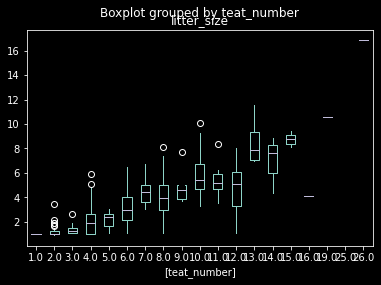

In [148]:
sub_pantheria_renamed.boxplot(column=['litter_size'],by=['teat_number'])
plt.grid(False)
plt.show()

(array([746., 449., 424.,   0., 239., 116.,   0., 162.,  20.,   5.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

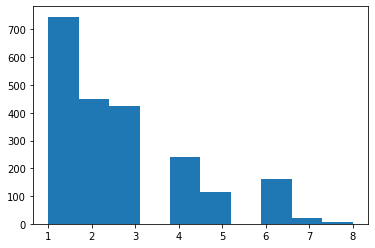

In [75]:
plt.hist(sub_pantheria_renamed["diet_breadth"].dropna())


(array([  2.,   3.,   7., 208., 300., 249., 172., 124.,  80.,  19.]),
 array([0.66268797, 1.31037014, 1.95805231, 2.60573448, 3.25341664,
        3.90109881, 4.54878098, 5.19646315, 5.84414532, 6.49182748,
        7.13950965]),
 <BarContainer object of 10 artists>)

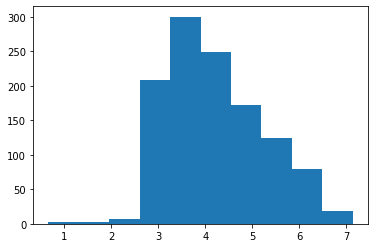

In [54]:
plt.hist(np.log(sub_pantheria_renamed["weaning_age_d"].dropna()))

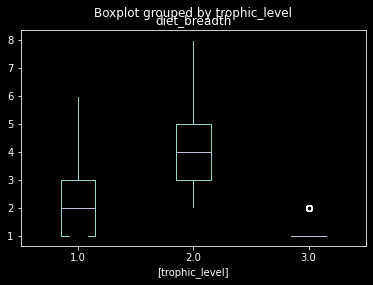

In [169]:
#rod=sub_pantheria_renamed[sub_pantheria_renamed['order']=='Rodentia']
sub_pantheria_renamed.boxplot(column=['diet_breadth'],by=['trophic_level'])
plt.grid(False)


<AxesSubplot:xlabel='interbirth_interval_d', ylabel='weaning_age_d'>

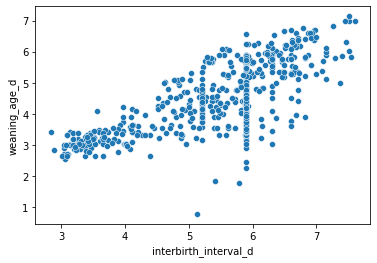

In [44]:
sns.scatterplot(x=np.log(sub_pantheria_renamed['interbirth_interval_d']),
            y=np.log(sub_pantheria_renamed["weaning_age_d"]))

<AxesSubplot:xlabel='interbirth_interval_d', ylabel='weaning_age_d'>

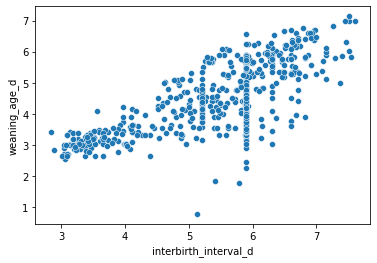

In [88]:
sns.scatterplot(x=np.log(sub_pantheria_renamed['interbirth_interval_d']),
            y=np.log(sub_pantheria_renamed["weaning_age_d"]))

<AxesSubplot:xlabel='body_mass_g', ylabel='weaning_age_d'>

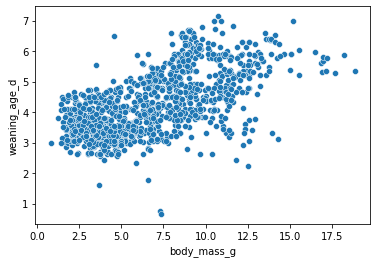

In [42]:
sns.scatterplot(x=np.log(sub_pantheria_renamed['body_mass_g']),
            y=np.log(sub_pantheria_renamed["weaning_age_d"]))

In [11]:
sub_pantheria_renamed['trophic_level'].value_counts()

1.0    783
2.0    739
3.0    639
Name: trophic_level, dtype: int64